In [1]:
pip install numpy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
pd.set_option('display.max_rows', None)
df = pd.read_csv('C:/Users/biswa/Downloads/Sample_HR.csv')

#df = df.shape[1]
#print('No of rows: ' , df)

duplicates_count = df[df.duplicated()].shape[0]
print("Number of duplicate rows:", duplicates_count)
df = df.drop_duplicates()
null_ages = df[df['Age'].isnull()]
print(null_ages)
Average_Age = df['Age'].mean()
Average_Age

df ['Age'] = df ['Age'].fillna(Average_Age)
df['Department'] = df ['Department'].fillna('Data Engineering')
# df = df[df['Departmet'] == 'Data Engineering']. shape[0]
df ['Full Name'] = df['First Name'] + ' ' + df['Last Name']


columns = df.columns.tolist()
last_name_index = columns.index('Last Name')
columns.insert(last_name_index + 1, columns.pop(columns.index('Full Name')))
df = df[columns]
df

# Get the no of experience
hire_date = pd.to_datetime(df['Hire_Date']).dt.year
# hire_date
current_year = datetime.now().year
df['YearsAtCompany'] = current_year-hire_date
df.head(1)

Number of duplicate rows: 32
      Employee_ID First Name   Last Name  Gender MaritalStatus    Department  \
10             11      Casey       Ayala    Male       Married  Manfacturing   
47             43    Rachael     Herrera    Male        Single          TECH   
80             76        Amy       Payne    Male        Single          TECH   
112           108       Beth  Harrington    Male        Single         Sales   
145           141     Arthur       Lyons  Female        Single          TECH   
172           168      Jesus        Sosa  Female       Married         Sales   
202           195     Sherry   Maldonado    Male       Married          TECH   
259           252   Caroline     Lindsey    Male        Single          TECH   
328           321      Emily        Good  Female        Single         Sales   
361           354     Stacie      Archer  Female      Divorced          TECH   
388           381       Jeff       Olsen  Female      Divorced         Sales   
403        

,Employee_ID,First Name,Last Name,Full Name,Gender,MaritalStatus,Department,Grade,Employee_Count,Job_Satisfaction,...,MonthlyRate,Age,Job Type,Job Experience,Hire_Date,Company_Environment,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,Country
0,1,Shelia,Mahoney,Shelia Mahoney,Male,Single,Sales,2,1,4,...,19479,41.0,Permannent,16,1/1/2010,5,0,1,15,United Kingdom


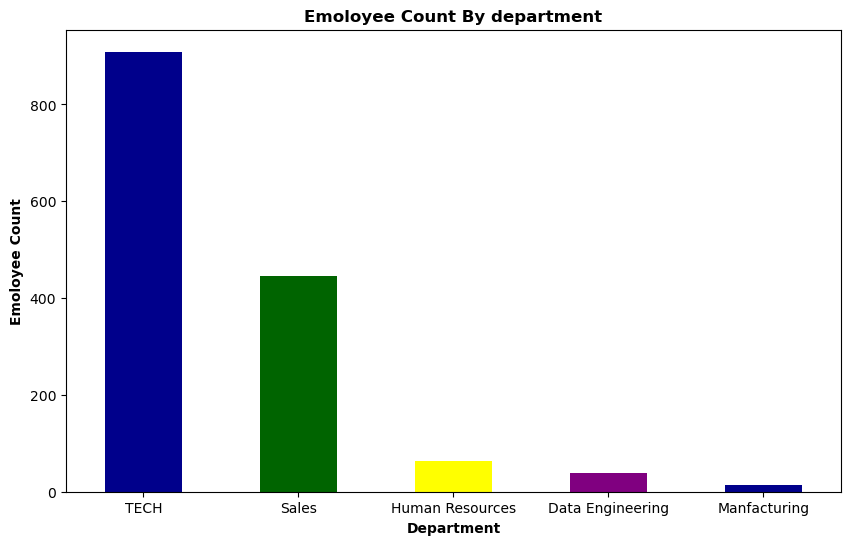

In [47]:
#Create a Bar Chart
department_count=df['Department'].value_counts()
plt.figure(figsize=(10,6))
color=['darkblue','darkgreen','yellow','purple']
department_count.plot(kind='bar',color=color)
plt.title('Emoloyee Count By department',fontweight='bold')
plt.xlabel('Department',fontweight='bold')
plt.ylabel('Emoloyee Count',fontweight='bold')
plt.xticks(rotation=0)
plt.show()

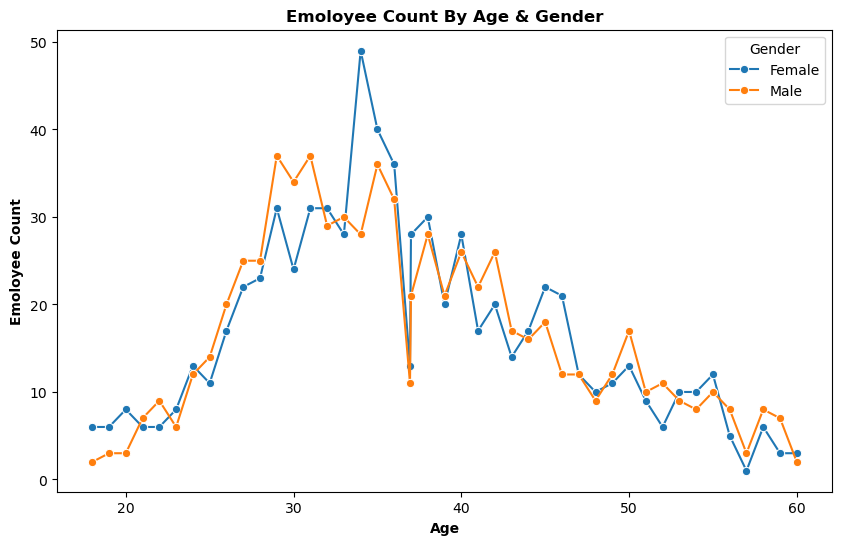

In [49]:
#Line Chart
age_gender=df.groupby(['Age','Gender']).size().reset_index(name='Count')
age_gender
plt.figure(figsize=(10,6))
sns.lineplot(data=age_gender, x='Age', y='Count', hue='Gender', marker='o')
plt.title('Emoloyee Count By Age & Gender',fontweight='bold')
plt.xlabel('Age',fontweight='bold')
plt.ylabel('Emoloyee Count',fontweight='bold')
plt.xticks(rotation=0)
plt.show()

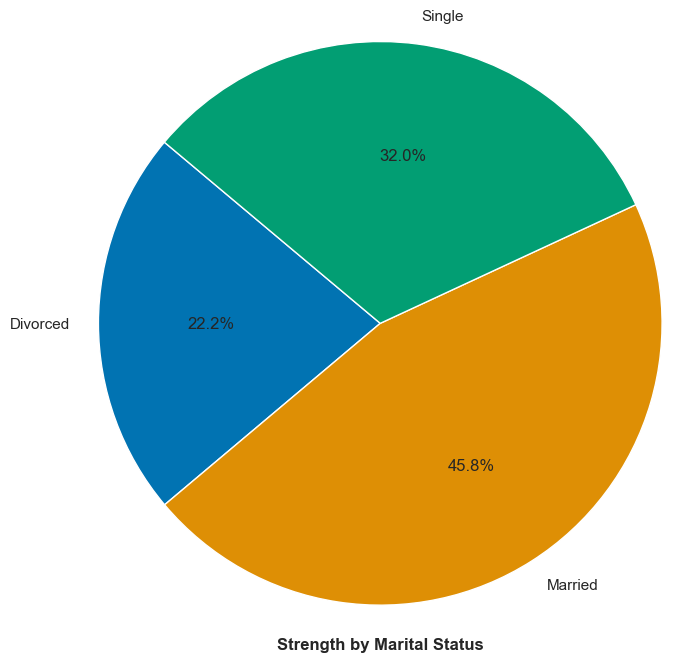

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
Marital_Status_count = df.groupby(['MaritalStatus']).size().reset_index(name='Count')
Marital_Status = Marital_Status_count['MaritalStatus']
Count = Marital_Status_count['Count']


sns.set(style="whitegrid")
colors = sns.color_palette("colorblind")[0:len(Marital_Status)]  


plt.figure(figsize=(8, 8))
plt.pie(Count, labels=Marital_Status, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Make it a circle

plt.xlabel('Strength by Marital Status', fontweight='bold')
plt.show()

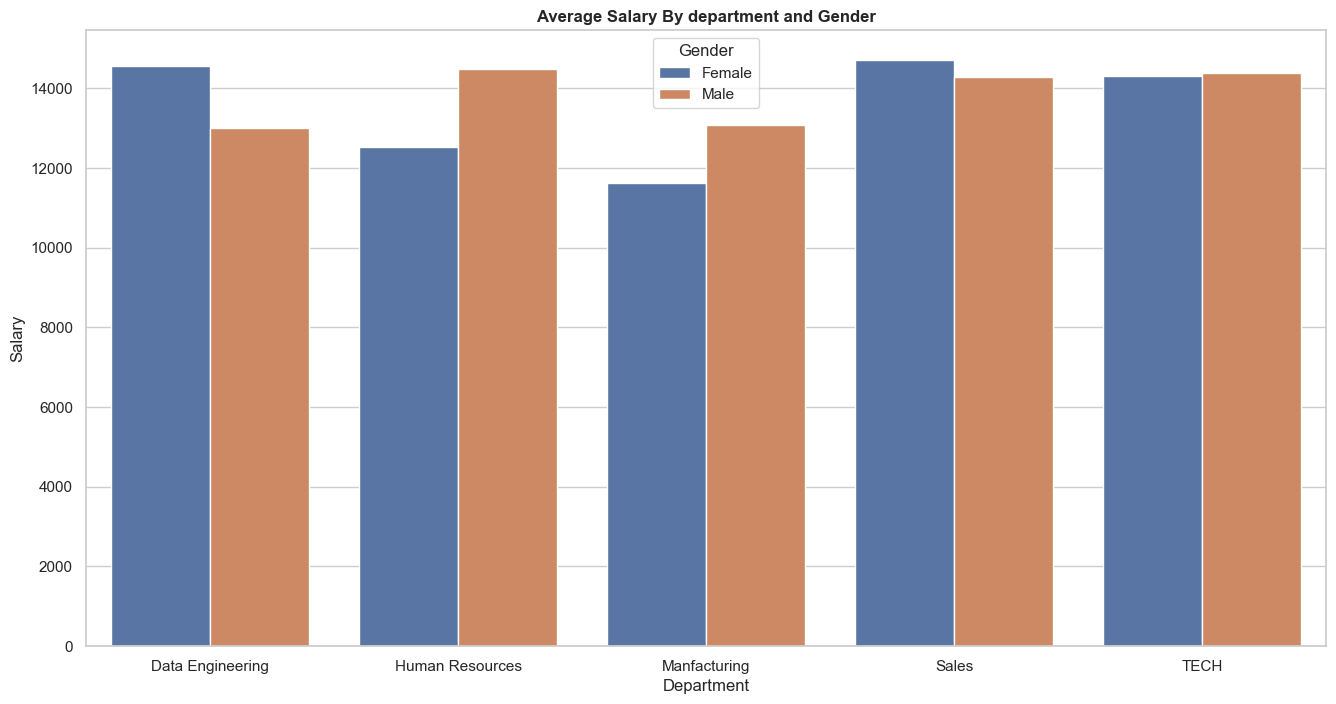

In [59]:
df=df.rename(columns={'MonthlyRate':'Salary'})
average_Salary=df.groupby(['Department','Gender'])['Salary'].mean().reset_index()
plt.figure(figsize=(16, 8))
sns.barplot(data=average_Salary, x='Department', y='Salary', hue='Gender')
plt.title('Average Salary By department and Gender',fontweight='bold')
plt.show()

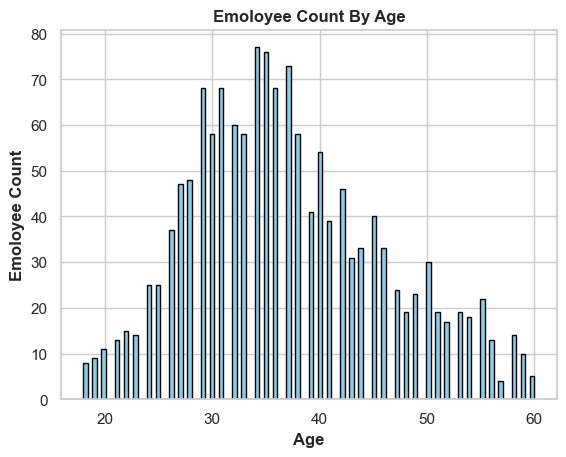

In [61]:
age=df['Age']
plt.hist(age, bins=100, edgecolor='black',color='skyblue')
plt.title('Emoloyee Count By Age',fontweight='bold')
plt.xlabel('Age',fontweight='bold')
plt.ylabel('Emoloyee Count',fontweight='bold')
plt.show()

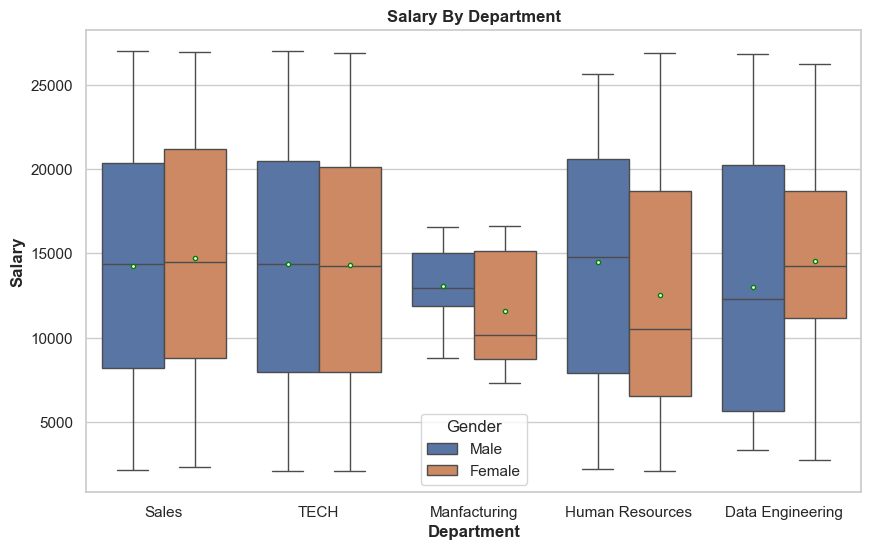

In [63]:
# ,showmeans='True',meanprops={"marker":"o"
#                                                                                   ,"markerfacecolor":"white"
#                                                                                   ,"markersize":"6"
#                                                                                   ,"markeredgecolor":"green"}
plt.figure(figsize=(10, 6))
sns.boxplot(x='Department', y='Salary', data=df,hue='Gender',showmeans='True',meanprops={"marker":"o"
                                                                                  ,"markerfacecolor":"white"
                                                                                  ,"markersize":"3"
                                                                                  ,"markeredgecolor":"green"})
plt.title('Salary By Department',fontweight='bold')
plt.xlabel('Department',fontweight='bold')
plt.ylabel('Salary',fontweight='bold')
plt.show()